<a href="https://colab.research.google.com/github/wojwozniak/university/blob/master/Machine_Learning/List01/List01Task03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 3 of [first UWr_ML_2024 homework](https://github.com/wojwozniak/university/blob/master/Machine_Learning/List01/Homework_1.pdf)

In this task, you will generate n = 10, 000 samples from a 2D Gaussian distribution and apply the k-means
algorithm to cluster the data into k = 3 clusters. You will calculate the average of the centroid norms and
analyze how the cumulative average converges over multiple iterations. The goal is to empirically estimate
the number of iterations required to achieve a stable result with 9-digit accuracy.

## Steps 1 - 4
First i will do step 1 - generate points.

We will need to do steps 2-4 many times so i will create a function doing those 3 steps


### Step 1
Generate n = 10000 samples (xi1, xi2) from a 2D Gaussian distribution.
### Step 2
Apply the k-means clustering algorithm with k = 3
### Step 3
For each centroid (Cj1, Cj2), j = 1, 2, 3, calculate its norm: ∥Cj∥ =q(Cj1)2 + (Cj2)2.
### Step 4
 Average the norms of the three centroids and call this value R1

In [1]:
import numpy as np
from sklearn.cluster import KMeans

np.random.seed(42) # Set seed for predictability

# Step 1: Generate points
mean = [0, 0] # Basically a center point for Gaussian distribution
cov = [[1, 0], [0, 1]] # Covariance matrix - points are completely unrelated
n = 10000 # We need 10000 samples

# Generate 10000 points around 0,0 that are completely unrelated to each other
samples = np.random.multivariate_normal(mean, cov, n)

# We could generate new points each time but convergence would be slower

def getRValue():
    # Step 2: Apply the k-means clustering algorithm with k = 3
    k = 3
    kmeans = KMeans(n_clusters = k) # not setting random state
    # only variable in our code will be K klustering algorithm

    kmeans.fit(samples)

    # Step 3: For each centroid (Cj1, Cj2), j = 1, 2, 3,
    #         calculate its norm: ∥Cj∥ =q(Cj1)2 + (Cj2)2.
    centers = kmeans.cluster_centers_
    norms = np.linalg.norm(centers, axis = 1)
    # for ki in range(k):
        # print(f"Centroid C_{ki+1}: {centers[ki]}, Norm: {norms[ki]}")

    # Step 4: Average the norms of the three centroids and call this value R1.
    R1 = np.mean(norms)
    # print(f'Average of the norms (R1): {R1}')
    return R1


## Step 5 and 6

 - Repeat this process 88 times (or more) to get the values R1, R2, . . . , R88.
 -  Calculate the cumulative average of the Ri values as 1 n Pn i=1 Ri for n = 1, 2, . . . , 88 (or more).

In [3]:
n_runs = 88
R_values = []
cumulative_averages = []
for n in range(n_runs):
    value = getRValue()
    R_values.append(value)
    cumulative_avg = sum(R_values) / (n+1)
    cumulative_averages.append(cumulative_avg)
    # print(f"Iteration: {n}. Average: {value}, Cumulative_average: {cumulative_avg}")

Iteration: 0. Average: 1.0355414939167744, Cumulative_average: 1.0355414939167744
Iteration: 1. Average: 1.0358232648066152, Cumulative_average: 1.035682379361695
Iteration: 2. Average: 1.0387596447975318, Cumulative_average: 1.0367081345069737
Iteration: 3. Average: 1.038943385749159, Cumulative_average: 1.0372669473175202
Iteration: 4. Average: 1.0383918911809558, Cumulative_average: 1.0374919360902073
Iteration: 5. Average: 1.03979825755808, Cumulative_average: 1.0378763230015193
Iteration: 6. Average: 1.03850939008126, Cumulative_average: 1.0379667611557681
Iteration: 7. Average: 1.0356599268807407, Cumulative_average: 1.0376784068713896
Iteration: 8. Average: 1.0400490259041593, Cumulative_average: 1.0379418089861416
Iteration: 9. Average: 1.0384187598795755, Cumulative_average: 1.0379895040754852
Iteration: 10. Average: 1.0400536376522413, Cumulative_average: 1.038177152582463
Iteration: 11. Average: 1.0387399739866632, Cumulative_average: 1.0382240543661463
Iteration: 12. Averag

## Step 7
Plot the cumulative averages and analyze how the value converges.

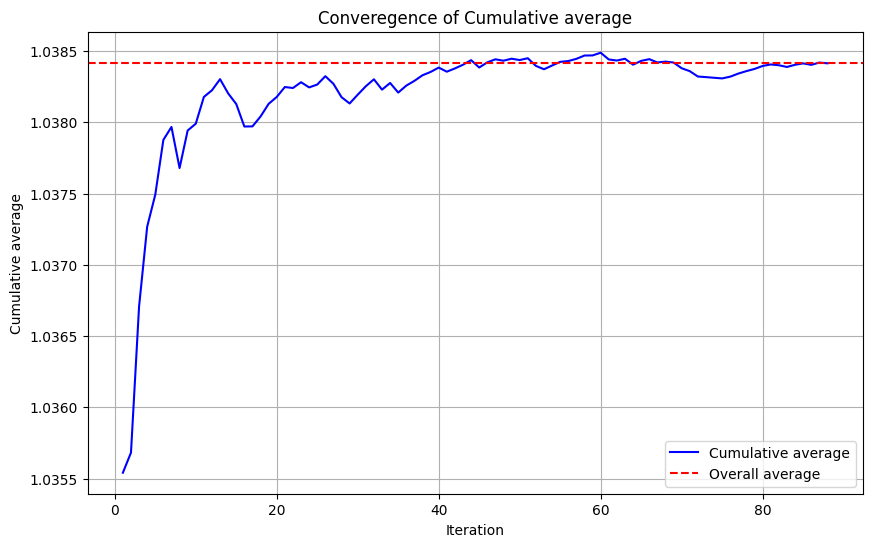

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_runs + 1), cumulative_averages, label="Cumulative average", color="blue")
plt.axhline(y=sum(R_values) / n_runs, label="Overall average", color="red", linestyle = "--")
plt.xlabel("Iteration")
plt.ylabel("Cumulative average")
plt.title("Converegence of Cumulative average")
plt.legend()
plt.grid(True)
plt.show()

## Final task:
Empirically estimate the number of iterations needed instead of 88 to achieve 9-digit accuracy
in the cumulative averages.

In [14]:
def estimate_iterations_for_accuracy(tolerance=1e-9):
    R_values = []
    iterations = 0
    previous_avg = None
    best_error = float('inf')

    while True:
        value = getRValue()
        R_values.append(value)
        iterations += 1

        if previous_avg is not None:
            avg = sum(R_values) / iterations
            error = abs(avg - previous_avg)

            if error < best_error:
                best_error = error
                print(f"Reached better accuracy on iteration {iterations}. Current error is {best_error:.4e}")

            if error < tolerance:
                return iterations, error

            previous_avg = avg
        else:
            previous_avg = sum(R_values) / iterations

iterations_needed, final_error = estimate_iterations_for_accuracy()
print(f"{iterations_needed} iterations needed to reach error of size {final_error}")


Reached better accuracy on iteration 2. Current error is 5.4202e-04
Reached better accuracy on iteration 3. Current error is 1.7508e-04
Reached better accuracy on iteration 4. Current error is 1.6501e-04
Reached better accuracy on iteration 6. Current error is 1.5146e-04
Reached better accuracy on iteration 8. Current error is 1.1990e-04
Reached better accuracy on iteration 12. Current error is 6.8914e-05
Reached better accuracy on iteration 15. Current error is 6.0497e-05
Reached better accuracy on iteration 16. Current error is 5.4275e-05
Reached better accuracy on iteration 20. Current error is 1.8556e-05
Reached better accuracy on iteration 22. Current error is 1.1189e-05
Reached better accuracy on iteration 33. Current error is 2.9137e-06
Reached better accuracy on iteration 37. Current error is 1.1369e-06
Reached better accuracy on iteration 59. Current error is 6.9852e-07
Reached better accuracy on iteration 143. Current error is 5.3393e-08
Reached better accuracy on iteration 2